### ML Final Project - Devinee Amin

### Exploratory Data Analysis
Using the "Election, COVID, and Demographic Data by County" dataset from Kaggle.

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
county_data = pd.read_csv("county_statistics.csv")
county_data = county_data[["county", "state", "lat", "long", "total_votes20", "TotalPop", "VotingAgeCitizen", "Poverty", "MeanCommute", "cases", "Hispanic", "White", "Black", "Native", "Asian", "Pacific", "IncomePerCap"]]

# clean the data
counties_df = county_data.dropna() # drop rows with missing data
counties_df = counties_df.rename(columns = {"total_votes20": "total_votes_2020", "lat": "latitude", "long":"longitude", "cases":"covid_cases", "Poverty":"poverty_percent"})
counties_df = counties_df.sort_values(by = ["state"]) # sort the data alphabetically by state

# calculate additional features
counties_df["covid_case_percent"] = counties_df["covid_cases"] / counties_df["TotalPop"] * 100
counties_df["voter_turnout"] = counties_df["total_votes_2020"] / counties_df["VotingAgeCitizen"] * 100

counties_df = counties_df.drop(counties_df[counties_df["voter_turnout"] > 100].index)
counties_df = counties_df.drop(counties_df[counties_df["voter_turnout"] < 15].index)

%store counties_df

Stored 'counties_df' (DataFrame)


In [3]:
counties_df.head()

,county,state,latitude,longitude,total_votes_2020,TotalPop,VotingAgeCitizen,poverty_percent,MeanCommute,covid_cases,Hispanic,White,Black,Native,Asian,Pacific,IncomePerCap,covid_case_percent,voter_turnout
701,Dale,AL,31.430371,-85.610957,19699.0,49393.0,37173.0,19.6,20.7,1926.0,6.1,69.5,19.2,0.5,0.9,0.0,23194.0,3.899338,52.992764
733,DeKalb,AL,34.459469,-85.807829,29322.0,71194.0,49579.0,21.5,23.2,3691.0,14.3,80.8,1.4,1.2,0.3,0.1,20020.0,5.184426,59.141975
1579,Lauderdale,AL,34.901719,-87.656247,44149.0,92590.0,72887.0,16.3,24.1,2743.0,2.5,84.9,9.8,0.4,0.7,0.0,25803.0,2.962523,60.571844
495,Choctaw,AL,32.022273,-88.265644,7461.0,13188.0,10454.0,22.3,32.7,395.0,0.5,56.3,42.1,0.0,0.1,0.0,20994.0,2.995147,71.369811
1792,Marshall,AL,34.369760,-86.304867,39492.0,94738.0,65777.0,21.0,23.9,4570.0,13.3,81.8,2.2,0.5,0.6,0.1,22710.0,4.823830,60.039223


In [4]:
# counts over features and labels
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2994 entries, 701 to 2754
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              2994 non-null   object 
 1   state               2994 non-null   object 
 2   latitude            2994 non-null   float64
 3   longitude           2994 non-null   float64
 4   total_votes_2020    2994 non-null   float64
 5   TotalPop            2994 non-null   float64
 6   VotingAgeCitizen    2994 non-null   float64
 7   poverty_percent     2994 non-null   float64
 8   MeanCommute         2994 non-null   float64
 9   covid_cases         2994 non-null   float64
 10  Hispanic            2994 non-null   float64
 11  White               2994 non-null   float64
 12  Black               2994 non-null   float64
 13  Native              2994 non-null   float64
 14  Asian               2994 non-null   float64
 15  Pacific             2994 non-null   float64
 16  Inco

C:\Users\devin\AppData\Local\Temp\ipykernel_54360\2020745332.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(counties_df.corr(), dtype=np.bool))


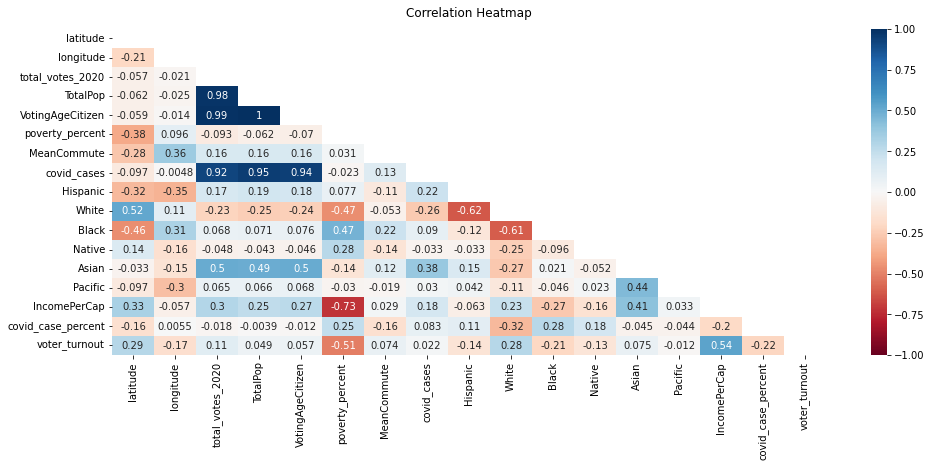

In [5]:
# feature-feature correlation
# correlation matrix

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(counties_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(counties_df.corr(), mask=mask, vmax=1, vmin=-1, annot=True, cmap='RdBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

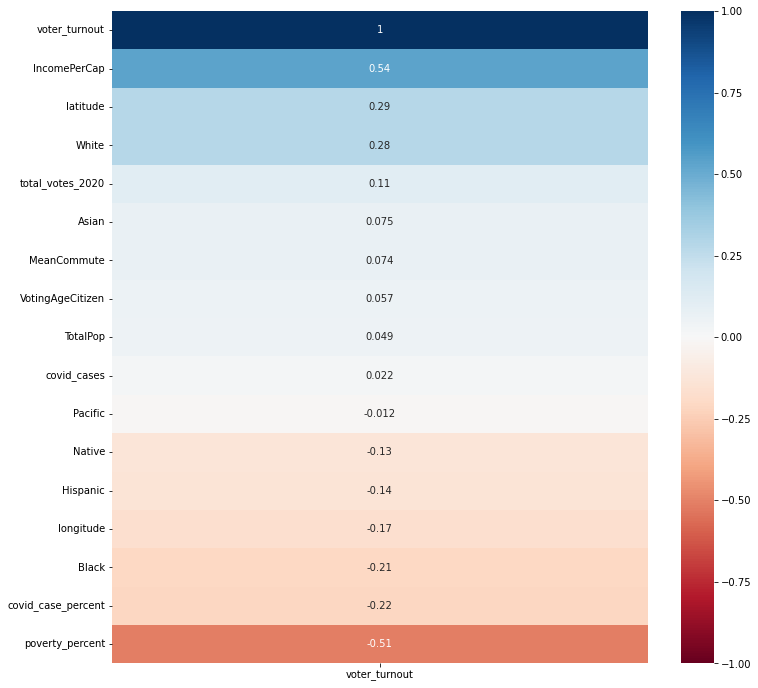

In [6]:
# heat map for feature-label correlation (label: voter_turnout)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(counties_df.corr()[['voter_turnout']].sort_values('voter_turnout').tail(100), vmax=1, vmin=-1, cmap='RdBu', annot=True, ax=ax);
ax.invert_yaxis()


After viewing the correlation between features, the relevent features are the following:

    Features: latitude, longitude, White, Black, IncomePerCap, covid_case_percent

    Label: voter_turnout

The graphics below show a selection of features maped on longitude and latitude to view the correlation based on location. 

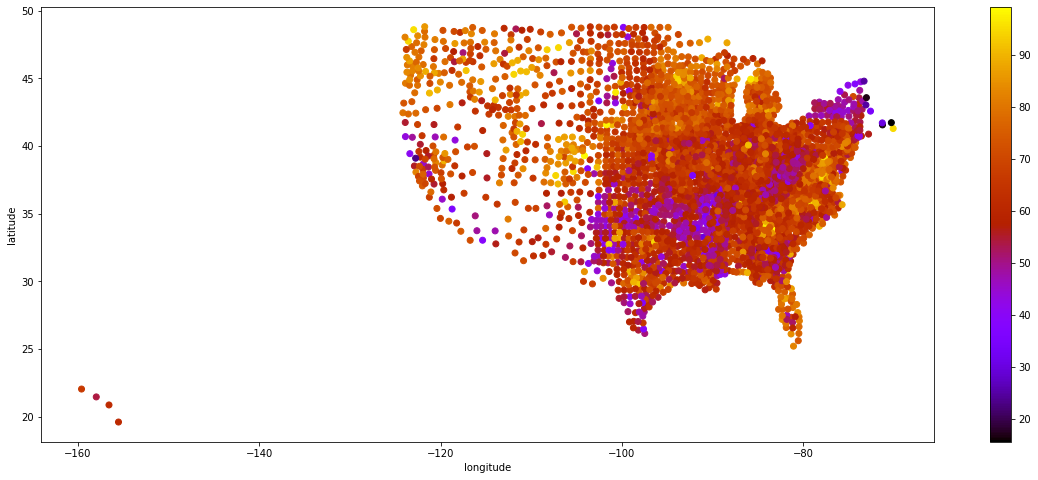

In [7]:
# plot voter turnout
plt.figure(figsize=(20,8))
plt.scatter(x=counties_df.longitude, y=counties_df.latitude, c=counties_df.voter_turnout, cmap="gnuplot")
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

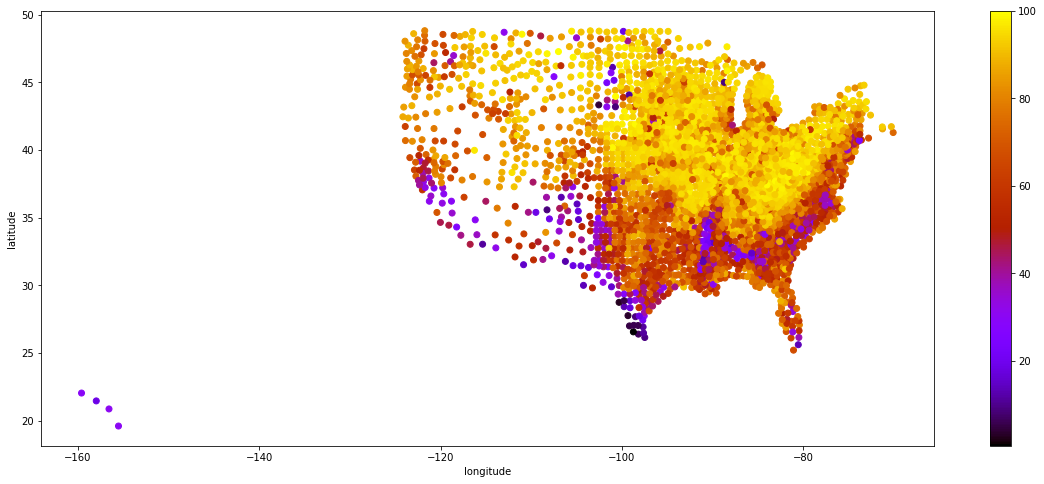

In [8]:
# plot percent of White population
plt.figure(figsize=(20,8))
plt.scatter(x=counties_df.longitude, y=counties_df.latitude, c=counties_df.White, cmap="gnuplot")
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

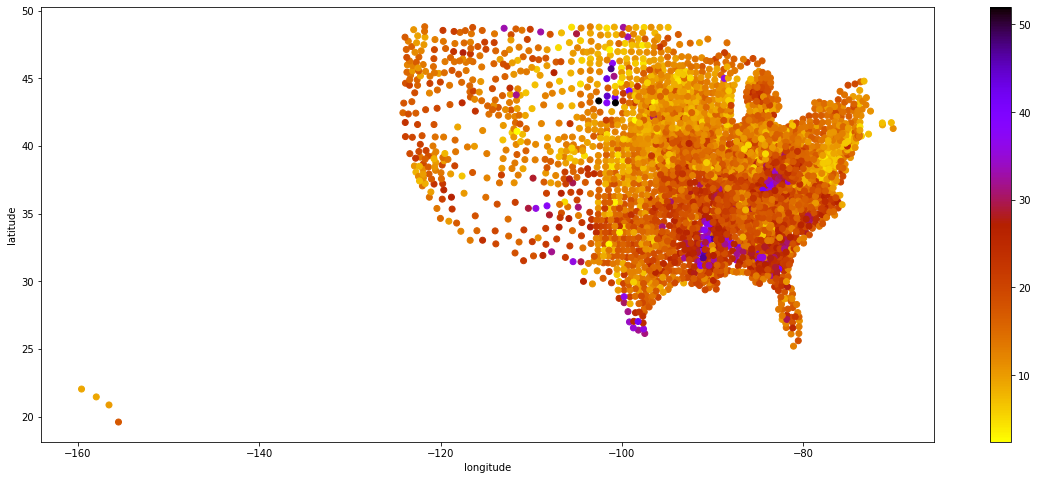

In [9]:
# plot poverty percentage
plt.figure(figsize=(20,8))
plt.scatter(x=counties_df.longitude, y=counties_df.latitude, c=counties_df.poverty_percent, cmap="gnuplot_r")
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

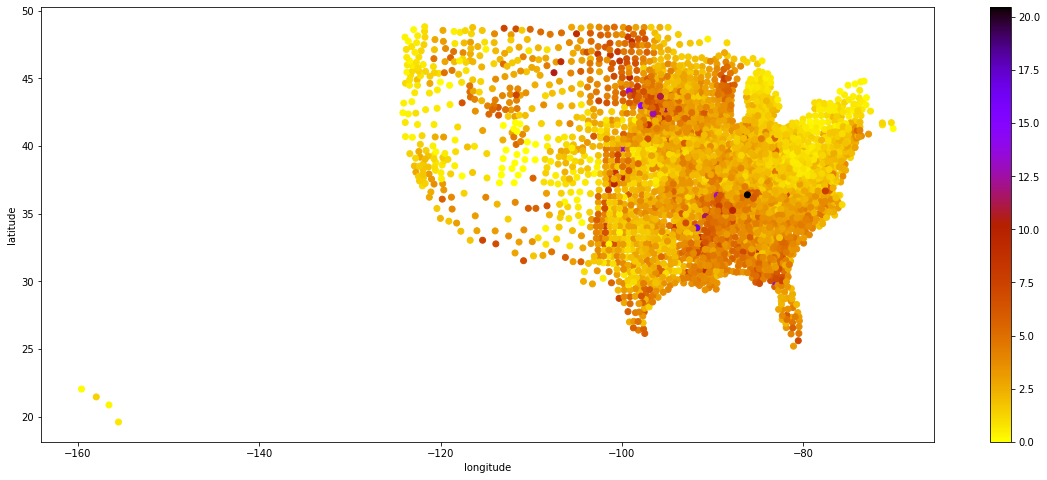

In [10]:
# plot covid case percentage
plt.figure(figsize=(20,8))
plt.scatter(x=counties_df.longitude, y=counties_df.latitude, c=counties_df.covid_case_percent, cmap="gnuplot_r")
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

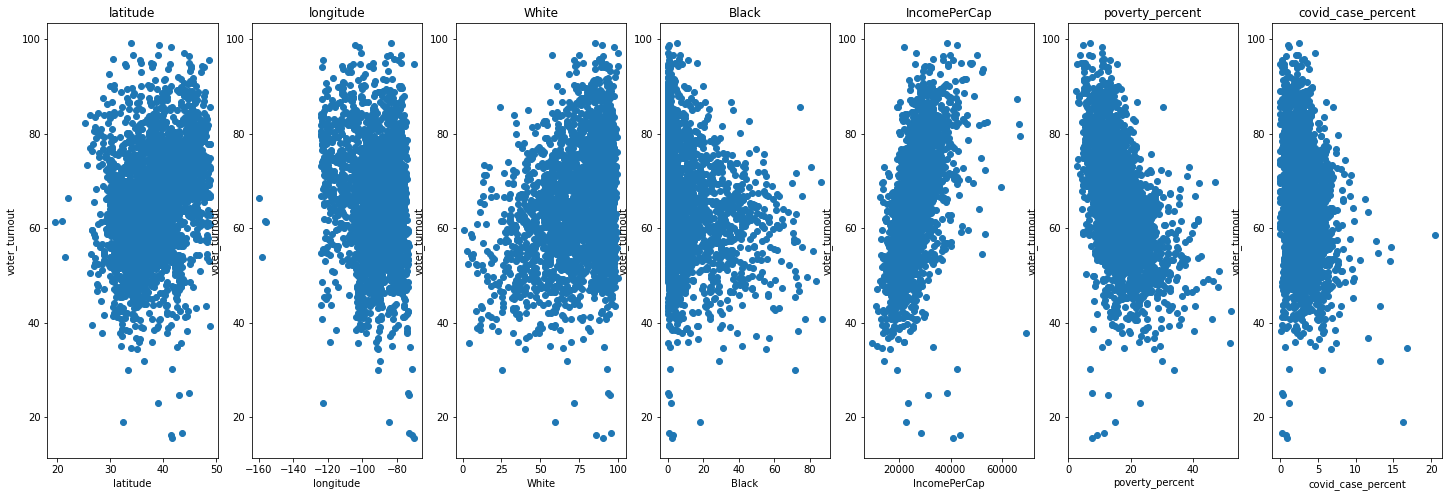

In [11]:
# feature-label correlation
plt.figure(figsize=(25, 8))

features = ['latitude','longitude','White', 'Black','IncomePerCap', 'poverty_percent','covid_case_percent']
target = counties_df['voter_turnout']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = counties_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('voter_turnout')